In [1]:
import numpy as np
import oiffile
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
from pycpd import RigidRegistration
from pycpd import AffineRegistration
from pycpd import DeformableRegistration
from PIL import Image

In [2]:
def get_proj(stack,channel):
    two_p_stack=oiffile.imread(stack)
    n_frames=two_p_stack.shape[1]
    two_p_stack=two_p_stack[channel,:,:,:]
    max_proj=np.amax(two_p_stack,axis=0)
    min_proj=np.amin(two_p_stack,axis=0)
    mean_proj=np.mean(two_p_stack,axis=0)
    plt.subplot(1,3,1)
    plt.title('Max')
    plt.imshow(max_proj)
    plt.subplot(1,3,2)
    plt.title('Min')
    plt.imshow(min_proj)
    plt.subplot(1,3,3)
    plt.title('Mean')
    plt.imshow(mean_proj)
    np.save('two_p_stack.npy',two_p_stack)
    np.save('mean_proj.npy',mean_proj)
    return n_frames

def crop_proj():
    cropped_max_proj=np.amax(cropped_stack,axis=0)
    cropped_min_proj=np.amin(cropped_stack,axis=0)
    cropped_mean_proj=np.mean(cropped_stack,axis=0)
    plt.subplot(1,3,1)
    plt.title('Max')
    plt.imshow(cropped_max_proj)
    plt.subplot(1,3,2)
    plt.title('Min')
    plt.imshow(cropped_min_proj)
    plt.subplot(1,3,3)
    plt.title('Mean')
    plt.imshow(cropped_mean_proj)
    np.save('cropped_mean_proj.npy',cropped_mean_proj)
    return cropped_mean_proj.shape
    
def plot_point_overlay(image,points):
    fig,ax=plt.subplots()
    ax.imshow(image)
    ax.scatter(points[:,0],points[:,1],c='red',marker=None)
    return fig,ax

def point_set(pict,filename,coordinates,):
    if isinstance(pict,np.ndarray):
        points=np.array(coordinates)
        plot_point_overlay(pict,points)
        np.savetxt(filename,points)
    else:
        pict=np.load(pict,allow_pickle=True)
        points=np.array(coordinates)
        plot_point_overlay(pict,points)
        np.savetxt(filename,points)

def visualize(iteration, error, X, Y, ax):
    plt.cla()
    ax.invert_yaxis()
    ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
    plt.text(0.87, 0.92, 'Iteration: {:d}\nQ: {:06.4f}'.format(
        iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='large')
    plt.draw()
    #plt.pause(0.1)
    plt.savefig('regged_5')

def main(target,source):
    X = np.loadtxt(target)
    Y = np.loadtxt(source)
    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    callback = partial(visualize,ax=fig.axes[0])
    reg = RigidRegistration(**{'X': X, 'Y': Y})
    reg.register(callback)
    TY,(s_reg,B_reg,t_reg)=reg.register()
    plt.show()
    return TY,s_reg,B_reg,t_reg,X,Y

def before_reg():
    X = np.loadtxt(target)
    Y = np.loadtxt(source)
    fig = plt.figure()
    fig.add_axes([0, 0, 1, 1])
    ax=fig.axes[0]
    ax.invert_yaxis()
    ax.scatter(X[:, 0],  X[:, 1], color='red', label='Target')
    ax.scatter(Y[:, 0],  Y[:, 1], color='blue', label='Source')
    ax.legend(loc='upper left', fontsize='large')
    plt.savefig('unregged_5')

41

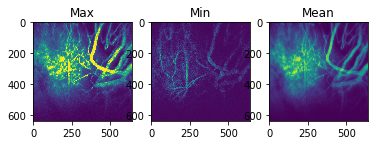

In [3]:
get_proj('../Downloads/oif/S_8_plaque&vessel_640_800_1x_1.oif',1)

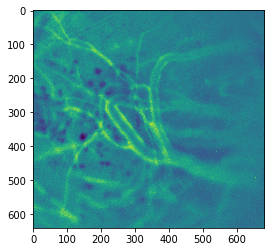

In [4]:
one_p=plt.imread('../Downloads/BP-MAX-crop.png')
plt.imshow(one_p)

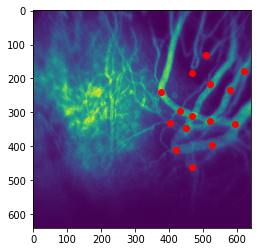

In [5]:
point_set('mean_proj.npy','points_target_full.txt',[[375,240],[420,410],[595,335],[527,395],[468,310],[402,332],[432,297],[450,345],[520,325],[467,185],[520,215],[468,460],[620,177],[578,235],[508,130]])

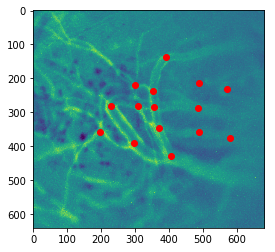

In [6]:
point_set(one_p,'points_source_full.txt',[[390,138],[228,280],[405,430],[297,390],[356,283],[300,220],[353,236],[310,280],[370,345],[490,215],[485,288],[198,358],[580,375],[490,358],[570,232]])

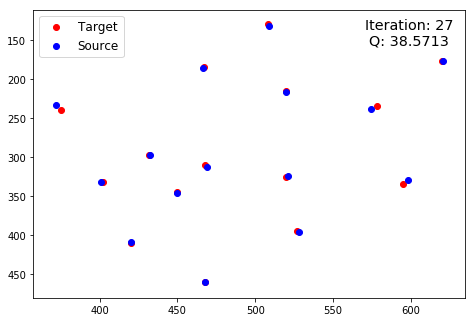

In [7]:
target='/home/uunojo2/Coreg/points_target_full.txt'
source='/home/uunojo2/Coreg/points_source_full.txt'
TY,s_reg,B_reg,t_reg,X,Y=main(target,source)

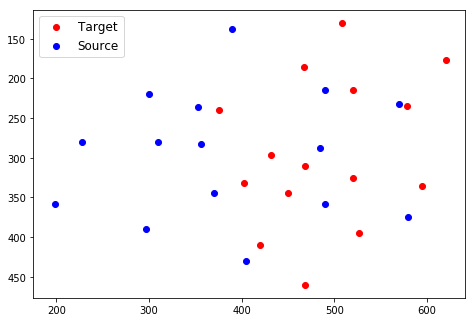

In [8]:
before_reg()

In [9]:
Y = np.loadtxt(source)
X=np.loadtxt(target)
B_reg
#np.dot(s_reg*Y,B_reg)+t_reg-TY
X-TY

array([[ 3.21049214,  6.16069924],
       [ 0.05087364,  1.71315219],
       [-3.11907582,  5.73182984],
       [-1.37477237, -1.32390307],
       [-1.02295569, -2.575236  ],
       [ 1.1021617 ,  0.10777677],
       [-0.37905814, -0.65802154],
       [ 0.06649884, -1.26883771],
       [-1.03390537,  0.34209209],
       [ 0.40775728, -1.36364039],
       [ 0.02491748, -1.83863321],
       [ 0.02802555,  0.50191392],
       [-0.5126738 ,  0.19881011],
       [ 3.2543982 , -3.65346474],
       [-0.70268365, -2.0745375 ]])

In [10]:
X-(np.dot(Y*s_reg,B_reg)+t_reg)

array([[ 3.21049214,  6.16069924],
       [ 0.05087364,  1.71315219],
       [-3.11907582,  5.73182984],
       [-1.37477237, -1.32390307],
       [-1.02295569, -2.575236  ],
       [ 1.1021617 ,  0.10777677],
       [-0.37905814, -0.65802154],
       [ 0.06649884, -1.26883771],
       [-1.03390537,  0.34209209],
       [ 0.40775728, -1.36364039],
       [ 0.02491748, -1.83863321],
       [ 0.02802555,  0.50191392],
       [-0.5126738 ,  0.19881011],
       [ 3.2543982 , -3.65346474],
       [-0.70268365, -2.0745375 ]])

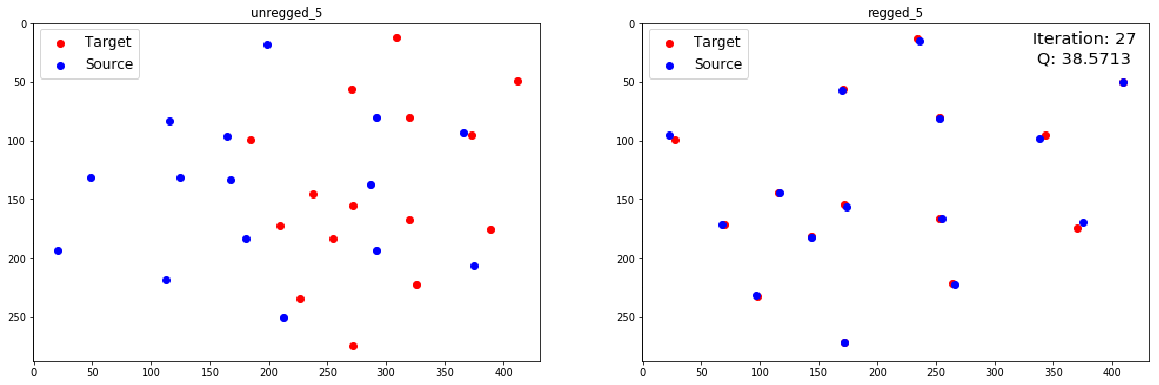

In [11]:
plt.figure(figsize=(20,30))
plt.tight_layout()
plt.subplot(1,2,1)
plt.title('unregged_5')
plt.imshow(plt.imread('./unregged_5.png'))
plt.subplot(1,2,2)
plt.title('regged_5')
plt.imshow(plt.imread('./regged_5.png'))

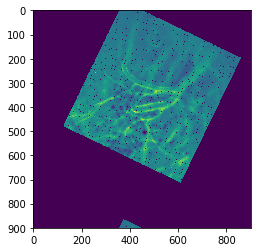

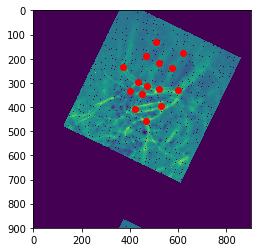

In [20]:
row,col=one_p.shape
one_T=np.empty([900,900],dtype=float)
for y in range(row):
    for x in range(col):
        Tc=np.dot([x*s_reg,y*s_reg],B_reg)+t_reg
        [Tx,Ty]=np.round(Tc).astype(int)
        one_T[Ty,Tx]=one_p[y,x]
plt.imshow(one_T)
plt.imsave('one_T',one_T)
plot_point_overlay(one_T,TY)
plt.savefig('Ted_0_points')

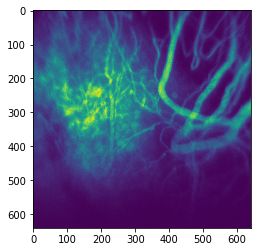

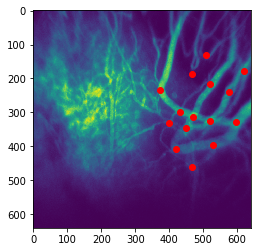

In [21]:
O_0=np.load('mean_proj.npy')
plt.imshow(O_0)
plt.imsave('O_0',O_0)
plot_point_overlay(O_0,TY)
plt.savefig('O_0_points')

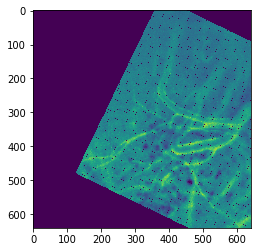

In [22]:
cropped_one_T=one_T[:640,:640]
plt.imshow(cropped_one_T)
plt.imsave('cropped_one_T',cropped_one_T)

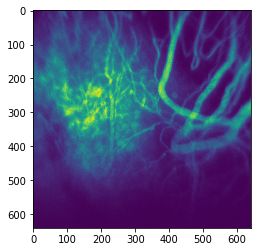

In [23]:
plt.imshow(plt.imread('../Coreg/mean_proj.png'))

In [24]:
T_one_p = Image.open('cropped_one_T.png')
O_two_p = Image.open('mean_proj.png')

In [25]:
print(T_one_p.size)

(640, 640)


In [26]:
print(O_two_p.size)

(640, 640)


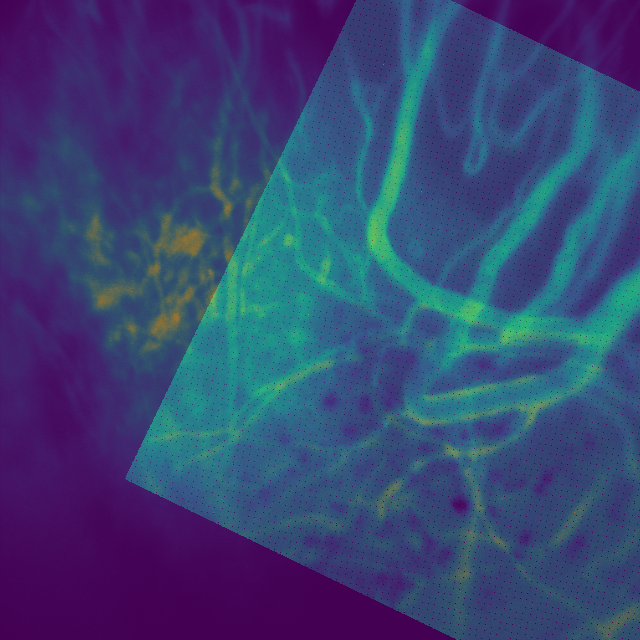

In [27]:
c=Image.blend(O_two_p,T_one_p,0.5)
c.save('c_two_one_p.png')
c